# Seoul Bike Trip Duration Prediction

<img src="Features_Description.png" style="float:right;" width="500"/>

### Context
- Trip duration is the most fundamental measure in all modes of transportation. 
- Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. 
- In order to predict the trip duration, data mining techniques are employed in this paper to predict the trip duration of rental bikes in Seoul Bike sharing system. 
- The prediction is carried out with the combination of Seoul Bike data and weather data.

### Content
- The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, 
temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.

### Acknowledgements
- V E, Sathishkumar (2020), "Seoul Bike Trip duration prediction", Mendeley Data, V1, doi: 10.17632/gtfh9z865f.1
- Sathishkumar V E, Jangwoo Park, Yongyun Cho, (2019), Seoul bike trip duration prediction using data mining techniques, IET Intelligent Transport Systems, doi: 10.1049/iet-its.2019.0796

### Goal
- Predict the trip duration

### Steps
- Exploratory Data Analysis (EDA)
- **Building Machine Learning Model**
    - Data Preprocessing
    - Feature Selection / Transformation
    - Mahcine Learning Algorithm
    - Feature Importance / Engineering
    - Hyperparameter Tuning
- Model Deployment

## Load libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from helper_functions import *

from timeit import default_timer as timer

## Data

In [36]:
dataset = joblib.load('data/dataset_cleaned.pkl')

In [37]:
dataset.sample(10).T

,8637943,8883833,7909594,2823015,6537104,31734,2593789,6457625,796567,792522
Duration,11.000000,20.000000,5.000000,10.000000,87.000000,14.000000,13.000000,4.000000,53.000000,8.000000
Distance,2000.000000,3110.000000,1320.000000,2140.000000,18610.000000,2470.000000,1530.000000,500.000000,10350.000000,1960.000000
PLong,37.660000,37.656830,37.467403,37.557461,37.689720,37.484409,37.479271,37.614231,37.523491,37.551224
PLatd,127.072968,127.039848,126.908142,126.861458,127.045197,126.928909,127.129578,127.096764,126.932899,127.089706
DLong,37.650459,37.636292,37.477097,37.562569,37.548496,37.473728,37.484531,37.616169,37.489052,37.537010
DLatd,127.080887,127.023376,126.911133,126.842461,127.074760,126.918404,127.120163,127.093483,126.992523,127.082245
Haversine,1.269462,2.705297,1.109772,1.768217,15.917818,1.506606,1.016002,0.360493,6.505846,1.711947
Pmonth,11.000000,11.000000,10.000000,6.000000,9.000000,1.000000,6.000000,9.000000,4.000000,4.000000
Pday,14.000000,21.000000,24.000000,15.000000,25.000000,5.000000,7.000000,23.000000,2.000000,2.000000
Phour,12.000000,22.000000,8.000000,7.000000,18.000000,21.000000,22.000000,18.000000,18.000000,16.000000


## Data preprocessing

### Check for missing values

In [38]:
dataset.isnull().sum().sum()

0

### Remove duplicated instances

In [39]:
# dataset = dataset.drop_duplicates()
# joblib.dump(dataset, 'data/dataset_cleaned.pkl')

### Divide data into dependent (y) and independent (X) varaibles

In [57]:
frac = 1#0.0001
X = dataset.drop(columns='Duration').sample(frac=frac, random_state=42)
y = dataset['Duration'].sample(frac=frac, random_state=42)

### Check for Categorical values

In [58]:
X.select_dtypes(include='object').sum()

Series([], dtype: float64)

### Split the dataset into training and test set

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape, X_test.shape

((7661786, 24), (1915447, 24))

### Feature scaling

In [61]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Feature selection / transformation

In [62]:
# will come back to this later

## Machine Learning Algorithms

In [63]:
def fit_ML_model(modelName, model, error=pd.DataFrame([], index=['Train Loss','Test Loss','y_mean','Time (s)'])):

    from sklearn.metrics import mean_squared_error
    
    start = timer()
    model.fit(X_train, y_train)
    rmse_train = mean_squared_error(y_train, model.predict(X_train), squared=False)
    rmse_test = mean_squared_error(y_test, model.predict(X_test), squared=False)
    end = timer()

    error[modelName] = [rmse_train, rmse_test, y.mean(), end-start]

    return model, error

In [47]:
# import sklearn
# sklearn.__version__ #'0.22.1'

###  Linear regression

In [48]:
from sklearn.linear_model import LinearRegression

lr, error = fit_ML_model('LinReg', LinearRegression())
error

,LinReg
Train Loss,2.246796
Test Loss,914.409078
y_mean,26.793319
Time (s),0.003955


In [49]:
feature_importances = pd.DataFrame(lr.coef_, index=X.columns, columns=['LinReg'])

### ElasticNetCV

In [50]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1], 
                          eps=1e-3, n_alphas=100, cv=5, max_iter=10000)

elastic, error = fit_ML_model('Elastic_CV', elastic_cv, error)
error
# the following warnings (if any) can be safely ignored

/home/p285464/.conda/envs/tfEnv_1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.80923954033642, tolerance: 40.31390130718954
  tol, rng, random, positive)
/home/p285464/.conda/envs/tfEnv_1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768.489620895678, tolerance: 44.080365742251225
  tol, rng, random, positive)
/home/p285464/.conda/envs/tfEnv_1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3681.8671918041364, tolerance: 44.080365742251225
  tol, rng, random, positive)
/home/p285464/.conda/envs/tfEnv_1/lib/python3.7/site-packages/sklearn/linear_model/_coor

,LinReg,Elastic_CV
Train Loss,2.246796,17.659080
Test Loss,914.409078,17.825221
y_mean,26.793319,26.793319
Time (s),0.003955,1.490014


In [51]:
elastic.l1_ratio_, elastic.coef_

(1.0,
 array([ 1.79826104e+01, -0.00000000e+00,  8.55475107e-03, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.53734693e-01,  1.35605643e+00,  6.50430367e-01,  0.00000000e+00,
         0.00000000e+00,  1.20501804e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.61035233e-01, -1.55295757e+00,
         0.00000000e+00, -0.00000000e+00,  1.01375075e+00, -0.00000000e+00]))

In [52]:
feature_importances['Elastic_CV'] = elastic.coef_

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators':[16,32,64,128,256],
#               'min_samples_split':[10,100,1000]}
# grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=16)

# rf, error = fit_ML_model('RandForest', grid, error)
# error

rf, error = fit_ML_model('RandForest', RandomForestRegressor(n_estimators=10, min_samples_split=10, n_jobs=10), error)
# error

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [17]:
rf.best_estimator_

AttributeError: 'RandomForestRegressor' object has no attribute 'best_estimator_'

In [ ]:
# feature_importances['RandForest'] = rf.best_estimator_.feature_importances_
feature_importances['RandForest'] = rf.feature_importances_

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[32,64,128,256],
              'min_samples_split':[10,100,1000],
              'learning_rate':[0.05,0.1,0.2]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, n_jobs=16)

gb, error = fit_ML_model('GradBoost', grid, error)
error

In [ ]:
gb.best_estimator_

In [ ]:
feature_importances['GradBoost'] = gb.best_estimator_.feature_importances_

### Neural Network

In [19]:
import tensorflow as tf
from tensorflow import keras

nodes = 64
n_hidden = 2
activation = 'relu'

ann = tf.keras.Sequential(keras.layers.Dense(nodes, activation=activation, input_shape=X_train.shape[1:]))

for _ in range(n_hidden-1):  
    ann.add(keras.layers.Dense(nodes, activation=activation))

ann.add(keras.layers.Dense(1))

ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1600      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


In [20]:
X_train_NN, X_val_NN, y_train_NN, y_val_NN = \
train_test_split(X_train, y_train, test_size=0.2, random_state=42) # cv=5 --> test_size=0.2

epochs = 50
batch_size = 10000

# lr =1e-2 # epcohs 0 --> 50 
lr =1e-3 # epochs 50 --> 100 

optimizer = tf.keras.optimizers.Adam(learning_rate=lr) 
ann.compile(loss='mean_squared_error', optimizer=optimizer)

start = timer()
history = ann.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), 
                    epochs=epochs, batch_size=batch_size, validation_batch_size=batch_size)
end = timer()

Epoch 1/50
613/613 [==============================] - 5s 7ms/step - loss: 599.1144 - val_loss: 195.9156
Epoch 2/50
613/613 [==============================] - 3s 5ms/step - loss: 157.7659 - val_loss: 33.1812
Epoch 3/50
613/613 [==============================] - 3s 6ms/step - loss: 22.4449 - val_loss: 13.4830
Epoch 4/50
613/613 [==============================] - 4s 6ms/step - loss: 13.2362 - val_loss: 12.0454
Epoch 5/50
613/613 [==============================] - 3s 6ms/step - loss: 11.5427 - val_loss: 10.8851
Epoch 6/50
613/613 [==============================] - 3s 6ms/step - loss: 10.4935 - val_loss: 10.0009
Epoch 7/50
613/613 [==============================] - 4s 6ms/step - loss: 9.7038 - val_loss: 9.2161
Epoch 8/50
613/613 [==============================] - 3s 6ms/step - loss: 9.0154 - val_loss: 8.6509
Epoch 9/50
613/613 [==============================] - 4s 6ms/step - loss: 8.4122 - val_loss: 8.1838
Epoch 10/50
613/613 [==============================] - 3s 6ms/step - loss: 8.0439 - v

In [21]:
feature_importances['NN_CPU'] =np.mean(ann.weights[0], axis=1)

In [22]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train_NN, ann.predict(X_train_NN, batch_size=batch_size))**0.5
rmse_test = mean_squared_error(y_test, ann.predict(X_test, batch_size=batch_size))**0.5
error['NN_CPU'] = [rmse_train, rmse_test, y.mean(), end-start]
error

,LinReg,RandForest,NN_CPU
Train Loss,16.459718,3.662931,1.877893
Test Loss,16.422776,6.092646,1.913501
y_mean,25.773569,25.773569,25.773569
Time (s),14.680111,373.606825,177.644225


### Plotting best results (NN)

In [ ]:
y_pred = ann.predict(X_test, batch_size=batch_size)
rel_res = (y_test.values-y_pred[:,0])/y_test.values

plot_idx = np.random.choice(range(len(y_test)), size=100000, replace=False)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5), dpi=100)

ax[0].scatter(y_test.values[plot_idx], y_pred[:,0][plot_idx], alpha=0.05);
ax[0].set_xlabel('$y_{test}$')
ax[0].set_ylabel('$y_{pred}$')
ax[0].set_xlim(-10,130)
ax[0].set_ylim(-10,130)
ax[0].plot(range(-10,130), range(-10,130), '--k', lw=2);

ax[1].scatter(np.arange(len(rel_res))[plot_idx], rel_res[plot_idx], alpha=0.05);
ax[1].set_xlabel('$i$')
ax[1].set_ylabel('$|y_{test}^i-y_{pred}^i|/y_{test}^i$');
ax[1].plot(range(len(rel_res)), 0*np.arange(len(rel_res)), '--k', lw=2);
ax[1].set_ylim(-50,50);

## Feature Importance

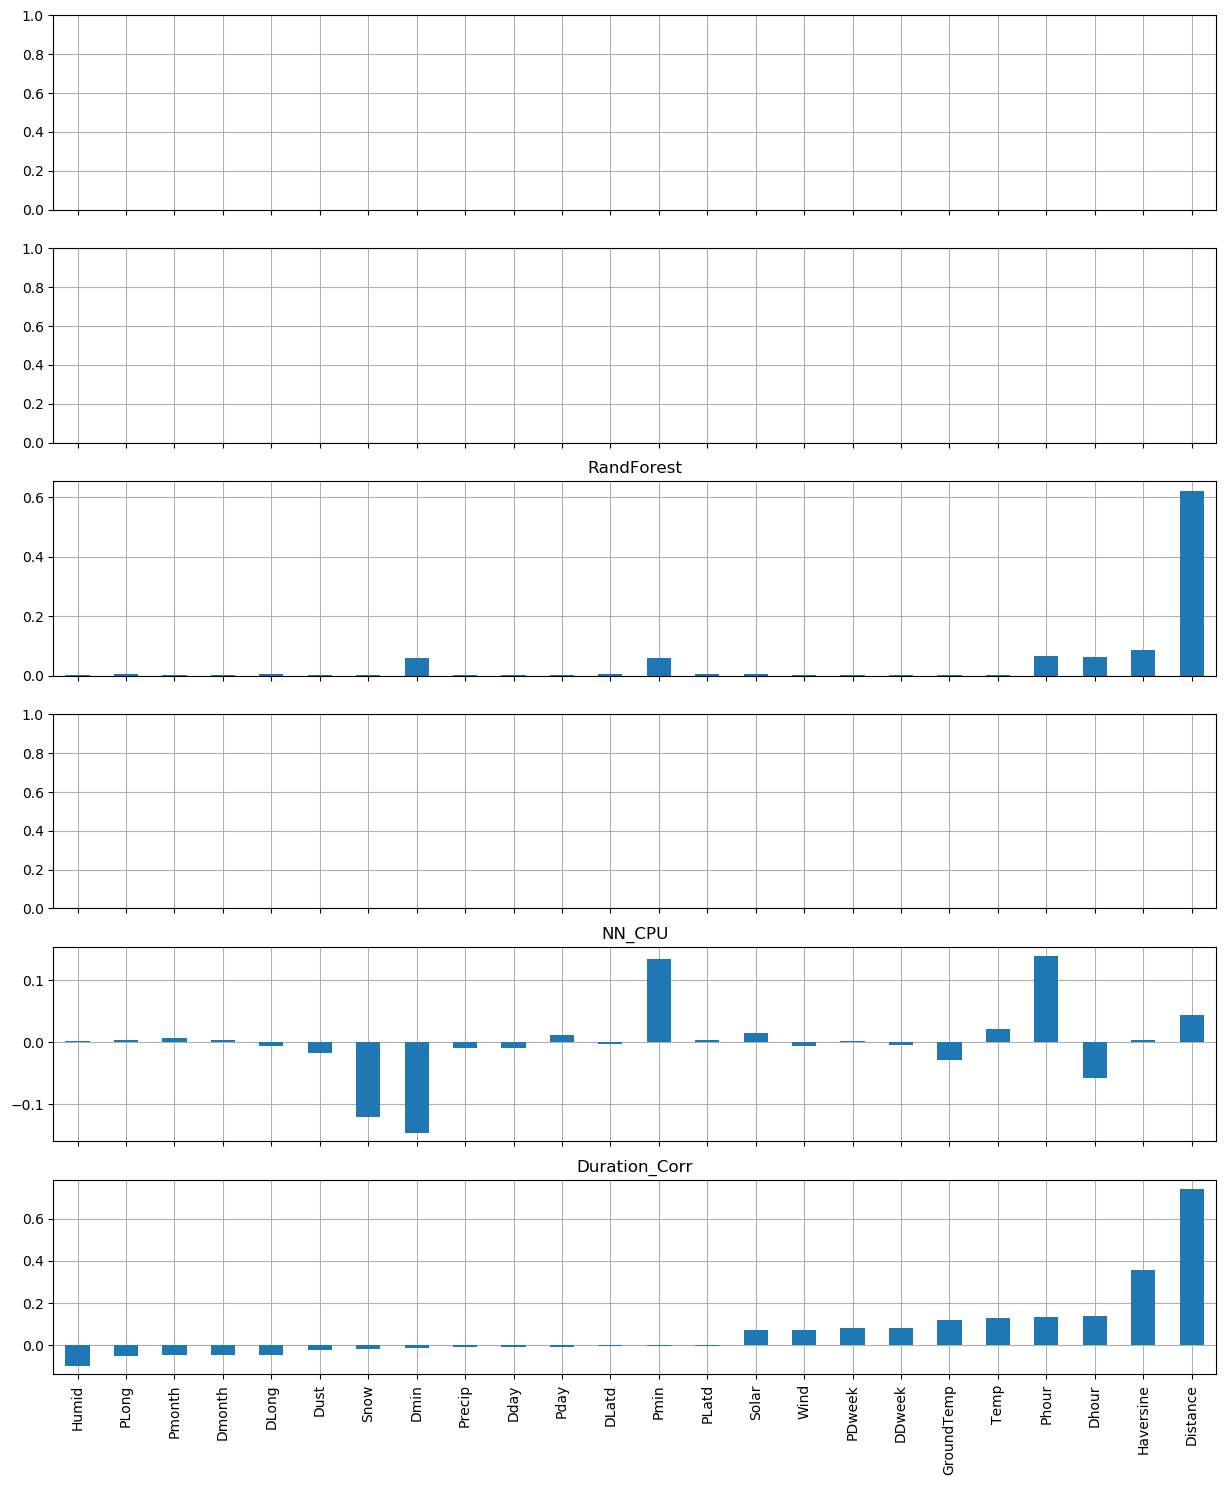

In [23]:
df_corr = dataset.corr()
feature_importances['Duration_Corr'] = df_corr['Duration'].sort_values()[:-1]

feature_importances = feature_importances.sort_values('Duration_Corr')

plt.rc('axes', axisbelow=True)
plt.rc('axes', grid=True)
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(15,18), dpi=100, sharex=True)

# feature_importances.LinReg.plot(kind='bar', ax=ax[0], title='LinReg');
# feature_importances.Elastic_CV.plot(kind='bar', ax=ax[1], title='Elastic_CV');
feature_importances.RandForest.plot(kind='bar', ax=ax[2], title='RandForest');
# feature_importances.GradBoost.plot(kind='bar', ax=ax[3], title='GradBoost');
feature_importances.NN_CPU.plot(kind='bar', ax=ax[4], title='NN_CPU');
feature_importances.Duration_Corr.plot(kind='bar', ax=ax[5], title='Duration_Corr');

plt.xticks(rotation=90);

In [56]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
1.5611 ± 0.1597,Distance
0.1827 ± 0.0188,Haversine
0.0255 ± 0.0040,Temp
0.0239 ± 0.0053,Humid
0.0186 ± 0.0066,Dhour
0.0163 ± 0.0020,GroundTemp
0.0157 ± 0.0046,Solar
0.0138 ± 0.0034,Pmin
0.0127 ± 0.0027,DLatd
0.0119 ± 0.0040,PLatd


### Extract import features

In [30]:
# NN_CPU_featImp = feature_importances.NN_CPU.abs().sort_values() # absolute sorted values
NN_CPU_featImp = feature_importances.RandForest.abs().sort_values() # absolute sorted values
# NN_CPU_featImp = feature_importances.Duration_Corr.abs().sort_values() # absolute sorted values
NN_CPU_featImp /= NN_CPU_featImp.sum() # normalize

# only consider features with more than 1% importance
NN_CPU_featImp = NN_CPU_featImp[NN_CPU_featImp>=0.01] 

impFeatures = list(NN_CPU_featImp.index)
len(impFeatures), impFeatures

(6, ['Pmin', 'Dmin', 'Dhour', 'Phour', 'Haversine', 'Distance'])

In [26]:
import tensorflow as tf
from tensorflow import keras

nodes = 64
n_hidden = 2
activation = 'relu'

ann_impFeat = tf.keras.Sequential(keras.layers.Dense(
    nodes, activation=activation, input_shape=(len(impFeatures),)))

for _ in range(n_hidden-1):  
    ann_impFeat.add(keras.layers.Dense(nodes, activation=activation))

ann_impFeat.add(keras.layers.Dense(1))

ann_impFeat.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [28]:
# X_train_NN_impFeat, X_test_val_NN_impFeat, y_train_NN_impFeat, y_test_val_NN_impFeat = \
# train_test_split(X_impFeatures, y, test_size=0.2, random_state=42)

# X_test_NN_impFeat, X_val_NN_impFeat, y_test_NN_impFeat, y_val_NN_impFeat = \
# train_test_split(X_test_val_NN_impFeat, y_test_val_NN_impFeat, test_size=0.5, random_state=42)

epochs = 50
batch_size = 10000

lr =1e-2 # epcohs 0 --> 50 
# lr =1e-3 # epochs 50 --> 100 

optimizer = tf.keras.optimizers.Adam(learning_rate=lr) 
ann_impFeat.compile(loss='mean_squared_error', optimizer=optimizer)

start = timer()
# history = ann_impFeat.fit(X_train_NN, y_train_NN, validation_data=(X_val_NN, y_val_NN), 
#                     epochs=epochs, batch_size=batch_size, validation_batch_size=batch_size)
history = ann_impFeat.fit(X[impFeatures], y, epochs=epochs, batch_size=batch_size)
end = timer()

Epoch 1/50
958/958 [==============================] - 6s 5ms/step - loss: 204.3537
Epoch 2/50
958/958 [==============================] - 5s 5ms/step - loss: 159.9288
Epoch 3/50
958/958 [==============================] - 5s 5ms/step - loss: 146.2188
Epoch 4/50
958/958 [==============================] - 5s 5ms/step - loss: 658.9524
Epoch 5/50
958/958 [==============================] - 5s 5ms/step - loss: 639.5790
Epoch 6/50
958/958 [==============================] - 5s 5ms/step - loss: 604.3573
Epoch 7/50
958/958 [==============================] - 5s 5ms/step - loss: 618.6633
Epoch 8/50
958/958 [==============================] - 5s 5ms/step - loss: 520.3550
Epoch 9/50
958/958 [==============================] - 5s 5ms/step - loss: 202.7622
Epoch 10/50
958/958 [==============================] - 5s 5ms/step - loss: 173.2902
Epoch 11/50
958/958 [==============================] - 5s 5ms/step - loss: 166.6608
Epoch 12/50
958/958 [==============================] - 5s 5ms/step - loss: 162.3570
E

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train_NN, ann.predict(X_train_NN, batch_size=batch_size))**0.5
rmse_test = mean_squared_error(y_test_NN, ann.predict(X_test_NN, batch_size=batch_size))**0.5
error['NN_featImp_CPU'] = [rmse_train, rmse_test, y.mean(), end-start]
error